In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.metrics import classification_report , accuracy_score ,ConfusionMatrixDisplay

In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataset/PatientCare.csv')
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,M,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,F,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,M,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,M,0


In [3]:
df.shape


(3309, 11)

In [4]:
df.dtypes

HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX              object
SOURCE            int64
dtype: object

In [5]:
df.isna().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [7]:
df['SEX'].value_counts()

M    1743
F    1566
Name: SEX, dtype: int64

In [8]:
le=LabelEncoder()

df['SEX']=le.fit_transform(df['SEX'])
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1,0


In [9]:
df['SOURCE'].value_counts()

0    1992
1    1317
Name: SOURCE, dtype: int64

<Axes: xlabel='SOURCE', ylabel='count'>

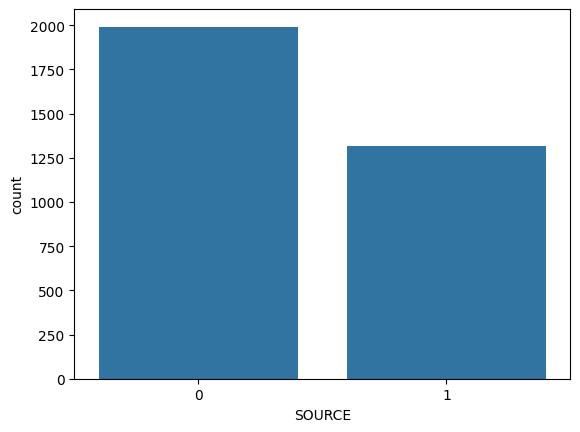

In [10]:
sns.countplot(data=df,x='SOURCE',order=df['SOURCE'].value_counts().index)

In [11]:
X=df.iloc[:,:-1]
X

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1
...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,0
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,1
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,1


In [12]:
y=df.iloc[:,-1]
y

0       1
1       0
2       0
3       0
4       0
       ..
3304    1
3305    1
3306    0
3307    0
3308    1
Name: SOURCE, Length: 3309, dtype: int64

In [13]:
scaler=MinMaxScaler()

X=scaler.fit_transform(X)
X

array([[0.36347197, 0.48344371, 0.42319749, ..., 0.43668831, 0.32653061,
        0.        ],
       [0.55877034, 0.67549669, 0.84326019, ..., 0.17857143, 0.35714286,
        1.        ],
       [0.52802893, 0.67549669, 0.48432602, ..., 0.64772727, 0.70408163,
        0.        ],
       ...,
       [0.44303797, 0.56953642, 0.45768025, ..., 0.53246753, 0.64285714,
        1.        ],
       [0.53707052, 0.75496689, 0.59717868, ..., 0.45454545, 0.32653061,
        1.        ],
       [0.33815552, 0.45695364, 0.34169279, ..., 0.56006494, 0.7244898 ,
        0.        ]])

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [15]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((2316, 10), (993, 10), (2316,), (993,))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       609
           1       0.71      0.63      0.67       384

    accuracy                           0.76       993
   macro avg       0.75      0.73      0.74       993
weighted avg       0.76      0.76      0.76       993

accuracy: 75.83081570996978


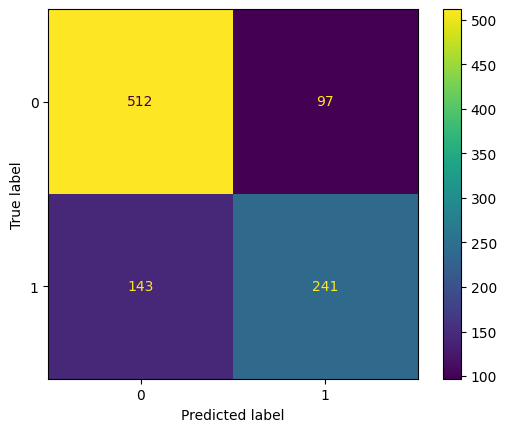

In [16]:
rf=RandomForestClassifier(random_state=1)

rf.fit(X_train,y_train)

y_pred1=rf.predict(X_test)

print(classification_report(y_test,y_pred1))
print('accuracy:',accuracy_score(y_test,y_pred1)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       609
           1       0.70      0.57      0.63       384

    accuracy                           0.74       993
   macro avg       0.73      0.71      0.72       993
weighted avg       0.74      0.74      0.73       993

accuracy: 74.11883182275932


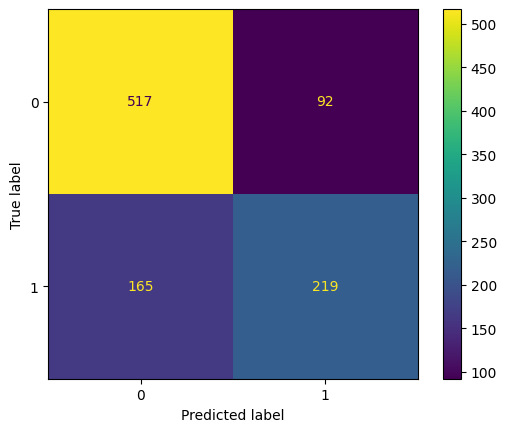

In [17]:
adb=AdaBoostClassifier(random_state=1)

adb.fit(X_train,y_train)

y_pred2=adb.predict(X_test)

print(classification_report(y_test,y_pred2))
print('accuracy:',accuracy_score(y_test,y_pred2)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))

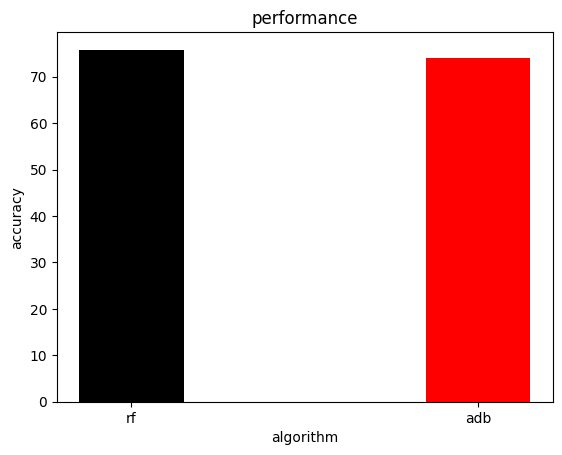

In [18]:
x=['rf','adb']
y=[(accuracy_score(y_test,y_pred1)*100) , (accuracy_score(y_test,y_pred2)*100)]
plt.bar(x,y,color=['black','red'],width=0.3)
plt.xlabel('algorithm')
plt.ylabel('accuracy')
plt.title('performance')
plt.show()



In [19]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False] }

In [20]:
from sklearn.model_selection import RandomizedSearchCV

clf= RandomizedSearchCV(rf,params)
clf.fit(X_train,y_train)
print(clf.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=1)


In [21]:
rf1=RandomForestClassifier(min_samples_leaf=4, n_estimators=300, random_state=1)
rf1.fit(X_train,y_train)
y_pred0=rf1.predict(X_test)
print(classification_report(y_test,y_pred0))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       609
           1       0.74      0.63      0.68       384

    accuracy                           0.77       993
   macro avg       0.76      0.74      0.75       993
weighted avg       0.77      0.77      0.77       993



In [22]:
y_new=rf1.predict(scaler.transform([[33.8,	11.1,	4.18,	4.6,	150,	26.6,	32.8,	80.9,	33	,0]]))
if y_new==1:
  print('hospitalization/In care')
else:
  print('home care')

hospitalization/In care


In [23]:
import pickle

filename='patient_care.pkl'
pickle.dump(rf1,open(filename,'wb'))
pickle.dump(scaler,open('mscaler.pkl','wb'))

In [24]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.5 MB/s eta 0:00:00


In [25]:
!wget -q -O - - ipv4.icanhazip.com

34.148.119.170


In [ ]:
!streamlit run patient_app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.148.119.170:8501

npx: installed 22 in 3.285s
your url is: https://angry-chefs-take.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
